In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [4]:
url = "https://raw.githubusercontent.com/pirple/Data-Mining-With-Python/master/Part%202/single_family_home_values.csv"
# Importing the file from the address contained in 'url' into 'df'
df = pd.read_csv(url, sep = ',')
# Showing the first 5 rows of 'df'

In [5]:
df.head(5)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676


### 1. Kiểm tra tổng quan dữ liệu

In [6]:
df.columns

Index(['id', 'address', 'city', 'state', 'zipcode', 'latitude', 'longitude',
       'bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize',
       'yearBuilt', 'lastSaleDate', 'lastSaleAmount', 'priorSaleDate',
       'priorSaleAmount', 'estimated_value'],
      dtype='object')

In [7]:
df.describe(include='all').T
#Từ bảng thống kê cho thấy các chỉ số sẽ ảnh hướng đến giá nhà bao gồm bedrooms, bathrooms, rooms, squareFootage, lotSize, yearBuild.
#Nhà lớn nhất có 15 bedsrooms, 12 bathrooms, 39 rooms. Nhà nhỏ nhất là không có phòng, tuy nhiên vẫn có squareFootage và lotSize.
#Tỉ lệ 50% đến 75% là phân khúc nhà có từ 3 bedrooms trở lên.
#squareFootage và lotSize có diện tích trung bình 1514 và 5820.
#Năm xây dựng xa nhất là 1874 , năm gần nhất 2016. Nhà càng xây dựng lâu giá sẽ thấp hơn nhà mới xây.
#Ngoài ra max lastSaleAmount là  45.600.000, tuy nhiên giá bán kỳ vọng max chỉ 10.145.310
#Cột unique cho thấy dòng address chỉ có 14998 giá trị, check duplicated địa chỉ.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,15000.0,NaN,NaN,NaN,51762290.737133,61908763.478567,143367.0,10048022.75,25632408.5,51142218.75,320948074.0
address,15000,14998,3118 N Vine St,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,15000,1,Denver,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,15000,1,CO,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zipcode,15000.0,NaN,NaN,NaN,80204.919467,9.715263,80022.0,80205.0,80206.0,80207.0,80209.0
latitude,14985.0,NaN,NaN,NaN,39.740538,0.023555,39.614531,39.727634,39.748048,39.758214,39.88802
longitude,14985.0,NaN,NaN,NaN,-104.964076,0.039788,-105.10844,-104.978737,-104.957689,-104.937522,-104.83093
bedrooms,15000.0,NaN,NaN,NaN,2.7084,0.897231,0.0,2.0,3.0,3.0,15.0
bathrooms,15000.0,NaN,NaN,NaN,2.195067,1.166279,0.0,1.0,2.0,3.0,12.0
rooms,15000.0,NaN,NaN,NaN,6.164133,1.958601,0.0,5.0,6.0,7.0,39.0


In [8]:
df.info()
# Kiem tra type data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

### Làm sạch dữ liệu

In [9]:
# Chuyen priorSaleDate va lastSaleDate sang type DateTime
df.lastSaleDate= pd.to_datetime(df.lastSaleDate)
df.priorSaleDate= pd.to_datetime(df.priorSaleDate)

In [10]:
#Kiem tra priorSaleDate va lastSaleDate
df[df['priorSaleDate']>df['lastSaleDate']]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
520,51138584,14 N Pearl St,Denver,CO,80203,39.716824,-104.979979,1,2.0,5,2267,3994,1895.0,2000-07-13,267500,2004-05-11,47500.0,560032


In [11]:
df.priorSaleDate[df.lastSaleDate - df.priorSaleDate < pd.Timedelta('0 days')] = df.lastSaleDate
# có thể dùng hàm replace để thay đổi vị trí giá trị hai cột, tuy nhiên nếu số lượng lớn thì cách này tối ưu hơn.

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9416/3454837262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.priorSaleDate[df.lastSaleDate - df.priorSaleDate < pd.Timedelta('0 days')] = df.lastSaleDate


In [12]:
df[df['priorSaleDate']>df['lastSaleDate']] # check lai data

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value


In [13]:
# Kiểm tra duplicated của cột address
df[df['address'].duplicated(keep= False)]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
3274,320948074,3650 N Adams St,Denver,CO,80205,NaN,NaN,4,4.0,7,2826,4690,2016.0,2017-05-23,735000,NaT,NaN,745537
4762,248507008,3118 N Vine St,Denver,CO,80205,NaN,NaN,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,NaT,NaN,670436
4764,216346608,3118 N Vine St,Denver,CO,80205,39.761214,-104.961873,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,NaT,NaN,671744
6145,4277764,3650 N Adams St,Denver,CO,80205,NaN,NaN,1,1.0,3,472,9370,1926.0,2015-07-20,250000,NaT,NaN,745483


In [14]:
df.drop(index=[4762],inplace= True)
# xóa index 4762 bị trùng lặp với index 4764.Vì các thông số giống nhau.

In [15]:
df[df['address'].duplicated(keep= False)]
'''Tuy nhiên về dữ liệu căn nhà này có vẻ như đã được xây mới năm 2016 lại nên sẽ drop index 6145, 
để cập nhật dữ liệu mới nhất cho khách hàng'''

'Tuy nhiên về dữ liệu căn nhà này có vẻ như đã được xây mới năm 2016 lại nên sẽ drop index 6145, \nđể cập nhật dữ liệu mới nhất cho khách hàng'

In [16]:
df.drop(index=[6145], inplace= True)

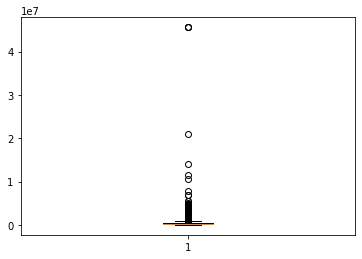

<Figure size 360x360 with 0 Axes>

count       14998.0
mean       405365.0
std        775751.0
min           259.0
25%        194000.0
50%        320000.0
75%        463400.0
max      45600000.0
Name: lastSaleAmount, dtype: float64


In [17]:
plt.boxplot(df['lastSaleAmount'])
# plt.ylim(0,25000000)
plt.figure(figsize=(5,5))
plt.show()
print(np.around(df['lastSaleAmount'].describe()))

In [18]:
df[df.lastSaleAmount==45600000.0]
# Kiểm tra thông tin các ngôi nhà có giá bán thuộc outlayer. Có 3 căn, tuy nhiên giá bán qua cao so với lotSize và squareFootage, số phòng...

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
2220,18197590,1350 Osceola St,Denver,CO,80204,39.737493,-105.037811,2,1.0,6,929,4690,1914.0,2007-01-19,45600000,2002-07-01,157000.0,402561
2473,18197589,1320 Osceola St,Denver,CO,80204,39.737062,-105.037810,2,1.0,4,700,6250,1953.0,2007-01-19,45600000,NaT,NaN,306400
2971,18197588,1330 Osceola St,Denver,CO,80204,39.737183,-105.037810,2,1.0,5,1262,4690,1907.0,2007-01-19,45600000,NaT,NaN,397880


In [19]:
df=df[df.lastSaleAmount!=45600000.0]
# Loại bỏ sự không hợp lý này.

### Data imputation

In [20]:
# Kiểm tra dữ liệu null
df.isnull().sum()

id                    0
address               0
city                  0
state                 0
zipcode               0
latitude             13
longitude            13
bedrooms              0
bathrooms             0
rooms                 0
squareFootage         0
lotSize               0
yearBuilt             1
lastSaleDate          0
lastSaleAmount        0
priorSaleDate      3823
priorSaleAmount    3709
estimated_value       0
dtype: int64

In [21]:
df['yearBuilt'].fillna(df['yearBuilt'].mean(),inplace= True)
# Thay thế giá trị null của yearBuilt bằng giá trị trung bình.

In [22]:
df[df['yearBuilt'].isna()]
#Kiểm tra lại

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value


In [23]:
# df[(df.priorSaleAmount==0) | (df.priorSaleAmount.isnull())]
# df[df.priorSaleAmount == df.lastSaleAmount]
# Có tổng cộng 222 giá trị đã trùng nhau trước đó
df.priorSaleAmount[(df.priorSaleAmount==0) | (df.priorSaleAmount.isnull())]=df.lastSaleAmount
df.priorSaleDate[(df.priorSaleAmount == 0) | (df.priorSaleAmount.isnull())] = df.lastSaleDate
# Chuyển priorSaleAmount, priorSaleDate tương ứng với lastSaleAmount, lastSaleDate trong trường hợp priorSaleAount bằng 0 hoặc Null.

In [24]:
df[(df.priorSaleAmount==0) | (df.priorSaleAmount.isnull())]
#kiem tra lai

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value


In [25]:
df[df.priorSaleDate == df.lastSaleDate]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
46,19150871,4756 S Perry St,Denver,CO,80123,39.630389,-105.038707,3,2.0,5,1355,9600,1960.0,1999-12-14,153500,1999-12-14,153500.0,366187
216,49467729,541 N Washington St,Denver,CO,80203,39.724882,-104.979095,4,2.0,8,2067,4687,1891.0,2001-08-09,280000,2001-08-09,280000.0,631581
382,51301298,411 N Pearl St,Denver,CO,80203,39.722846,-104.980242,2,2.0,6,1152,3960,1913.0,2000-11-15,249900,2000-11-15,249900.0,560662
385,19113699,62 N Lincoln St,Denver,CO,80203,39.717648,-104.985884,5,5.0,8,2176,6120,1890.0,2004-08-19,330000,2004-08-19,330000.0,792470
493,51256296,515 N Pearl St,Denver,CO,80203,39.724452,-104.980238,2,2.0,5,1479,4375,1916.0,2000-03-14,223600,2000-03-14,223600.0,557935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14696,46186826,800 Bonnie Brae Blvd,Denver,CO,80209,39.702122,-104.956032,3,3.0,8,1638,9200,1940.0,2002-02-25,567500,2002-02-25,567500.0,1157112
14758,147918026,383 S Sherman St,Denver,CO,80209,39.709569,-104.985556,3,2.0,5,1385,4320,1893.0,2000-07-20,330000,2000-07-20,330000.0,615565
14772,51256974,738 S Gilpin St,Denver,CO,80209,39.703122,-104.967180,3,1.0,6,1130,4690,1922.0,1999-07-19,262000,1999-07-19,262000.0,750034
14807,46399747,999 S Euclid Way,Denver,CO,80209,39.698969,-104.955935,3,3.0,7,2412,8200,1951.0,2002-06-24,450600,2002-06-24,450600.0,1153061


In [26]:
df[df.priorSaleDate != df.lastSaleDate]
# Trường hợp này vẫn bằng giá nhưng lại khác nhau về priorSaleDate và lastSaleDate và khi priorSaleDate là null, nhưng lastSaleAmout và priorSaleAmount bằng nhau.

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaT,216935.0,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaT,330000.0,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,185000.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,308000.0,513676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,51411356,802 S High St,Denver,CO,80209,39.701902,-104.964871,4,4.0,8,2169,4950,1922.0,2000-08-24,333000,NaT,333000.0,1080081
14996,21721153,214 S Lincoln St,Denver,CO,80209,39.712608,-104.986000,3,3.0,11,2937,4500,1890.0,2015-03-05,645000,2012-07-23,557500.0,807306
14997,12995320,870 S Race St,Denver,CO,80209,39.700736,-104.963707,3,5.0,7,2937,4680,2007.0,2012-01-17,1115000,2008-07-15,1208214.0,1737156
14998,39611615,130 S Lafayette St,Denver,CO,80209,39.714088,-104.970701,3,4.0,10,3193,4970,2005.0,2011-08-10,1350000,2004-12-07,405000.0,2008794


In [27]:
df.priorSaleAmount[df.priorSaleDate.isnull()]=df.lastSaleAmount
df.priorSaleDate[df.priorSaleDate.isnull()]=df.lastSaleDate

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9416/815680316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.priorSaleAmount[df.priorSaleDate.isnull()]=df.lastSaleAmount
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9416/815680316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.priorSaleDate[df.priorSaleDate.isnull()]=df.lastSaleDate


In [28]:
df[df.priorSaleDate != df.lastSaleDate]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,185000.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,308000.0,513676
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,150304831,376 S High St,Denver,CO,80209,39.709681,-104.964860,3,2.0,7,1913,4990,1925.0,2015-09-10,815000,1994-05-06,142000.0,784955
14996,21721153,214 S Lincoln St,Denver,CO,80209,39.712608,-104.986000,3,3.0,11,2937,4500,1890.0,2015-03-05,645000,2012-07-23,557500.0,807306
14997,12995320,870 S Race St,Denver,CO,80209,39.700736,-104.963707,3,5.0,7,2937,4680,2007.0,2012-01-17,1115000,2008-07-15,1208214.0,1737156
14998,39611615,130 S Lafayette St,Denver,CO,80209,39.714088,-104.970701,3,4.0,10,3193,4970,2005.0,2011-08-10,1350000,2004-12-07,405000.0,2008794


In [29]:
df.priorSaleAmount[(df.priorSaleAmount != df.lastSaleAmount) & (df.priorSaleDate == df.lastSaleDate)] = df.lastSaleAmount
# Trường hợp lastSaleDate và priorSaleDate bằng nhau nhưng priorSaleAmount khác với lastSaleAmount

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9416/614596711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.priorSaleAmount[(df.priorSaleAmount != df.lastSaleAmount) & (df.priorSaleDate == df.lastSaleDate)] = df.lastSaleAmount


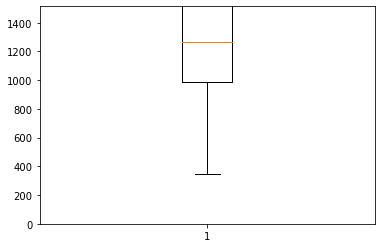

count    14995.0
mean      1515.0
std        831.0
min        350.0
25%        986.0
50%       1268.0
75%       1766.0
max      10907.0
Name: squareFootage, dtype: float64


In [30]:
plt.boxplot(df['squareFootage']);
plt.ylim(0,1514)
plt.show()
print((np.around(df['squareFootage'].describe())))

In [31]:
df.loc[(df.squareFootage==350)|(df.squareFootage==10907)]
#Kiểm tra hai điểm max(outlayer) và min có thông tin hợp lý không?

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
1538,3858650,625 Newton St,Denver,CO,80204,39.726646,-105.037598,0,1.0,2,350,5960,1924.0,2017-02-07,100000,2002-08-01,65000.0,241357
8173,51266875,2109 E 9th Ave,Denver,CO,80206,39.730670,-104.962130,9,8.0,16,10907,42381,1918.0,2010-07-01,4500000,2004-05-04,4500000.0,9093801


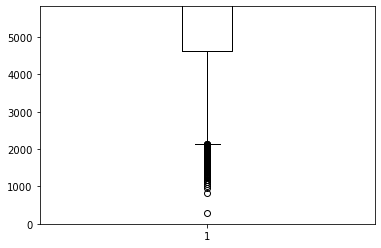

count     14995.000000
mean       5820.727442
std        3013.597847
min         278.000000
25%        4620.000000
50%        5950.000000
75%        6270.000000
max      122839.000000
Name: lotSize, dtype: float64


In [32]:
plt.boxplot(df['lotSize']);
plt.ylim(0,5820)
plt.show()
print(df['lotSize'].describe())
# Sau khi điền giá trị mean của lotSize phát hiện có outlayer , check thông tin

In [33]:
df.loc[(df.lotSize==278)|(df.lotSize==122839)]
# Đối với diện tích 278 nhưng lại có tổng 13 phòng, quá nhỏ so với các căn nhà có diện tích lớn hơn với số phòng tương tự.

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
9068,184292071,1256 Columbine St,Denver,CO,80206,39.736250,-104.957140,5,5.0,13,3068,278,1929.512872,2017-05-11,400000,2012-04-04,132500.0,264843
13655,51047101,600 S University Blvd,Denver,CO,80209,39.706183,-104.957094,5,6.0,14,7200,122839,2001.000000,1999-02-23,2000000,1999-02-23,2000000.0,7582992


In [34]:
df.drop(index=[9068],inplace=True)

In [35]:
df.zipcode.dtype

dtype('int64')

In [36]:
df.zipcode=df.zipcode.astype(str)

In [37]:
df.zipcode.unique()

array(['80022', '80033', '80123', '80202', '80203', '80204', '80205',
       '80206', '80207', '80209'], dtype=object)

In [38]:
df = df[(df.latitude.isnull() == False) & (df.longitude.isnull() == False)]

### Analysis

In [39]:
df.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,2004-09-23,216935.0,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,2008-04-03,330000.0,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,185000.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,308000.0,513676


In [40]:
df.loc[:,['bathrooms','bedrooms','rooms','squareFootage','lotSize','yearBuilt','priorSaleDate','priorSaleAmount','lastSaleDate','lastSaleAmount','estimated_value']]

,bathrooms,bedrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleDate,priorSaleAmount,lastSaleDate,lastSaleAmount,estimated_value
0,2.0,3,6,1378,9968,2003.0,2004-05-13,165700.0,2009-12-17,75000,239753
1,2.0,2,6,1653,6970,2004.0,2004-09-23,216935.0,2004-09-23,216935,343963
2,1.0,3,0,1882,23875,1917.0,2008-04-03,330000.0,2008-04-03,330000,488840
3,3.0,4,0,2400,11500,1956.0,2008-06-27,185000.0,2008-12-02,185000,494073
4,4.0,3,8,2305,5600,1998.0,2011-12-29,308000.0,2012-07-18,308000,513676
...,...,...,...,...,...,...,...,...,...,...,...
14995,4.0,4,8,2169,4950,1922.0,2000-08-24,333000.0,2000-08-24,333000,1080081
14996,3.0,3,11,2937,4500,1890.0,2012-07-23,557500.0,2015-03-05,645000,807306
14997,5.0,3,7,2937,4680,2007.0,2008-07-15,1208214.0,2012-01-17,1115000,1737156
14998,4.0,3,10,3193,4970,2005.0,2004-12-07,405000.0,2011-08-10,1350000,2008794


In [41]:
df['last_Sale_year']=pd.DatetimeIndex(df['lastSaleDate']).year
df['prior_Sale_year']=pd.DatetimeIndex(df['priorSaleDate']).year
df['years_between']=df['last_Sale_year']-df['prior_Sale_year']
df['last_sale_sqrt']=df['lastSaleAmount']/df['squareFootage']
df['prior_sale_sqrt']=df['priorSaleAmount']/df['squareFootage']
df['Sale_difference']=df['last_sale_sqrt']-df['prior_sale_sqrt']
df['estimated_sqrt']=df['estimated_value']/df['squareFootage']

In [42]:
df.head(10)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,priorSaleDate,priorSaleAmount,estimated_value,last_Sale_year,prior_Sale_year,years_between,last_sale_sqrt,prior_sale_sqrt,Sale_difference,estimated_sqrt
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,...,2004-05-13,165700.0,239753,2009,2004,5,54.426705,120.246734,-65.820029,173.986212
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,...,2004-09-23,216935.0,343963,2004,2004,0,131.237145,131.237145,0.000000,208.084090
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,...,2008-04-03,330000.0,488840,2008,2008,0,175.345377,175.345377,0.000000,259.744952
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,...,2008-06-27,185000.0,494073,2008,2008,0,77.083333,77.083333,0.000000,205.863750
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,...,2011-12-29,308000.0,513676,2012,2011,1,133.622560,133.622560,0.000000,222.852928
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,...,2005-05-16,339000.0,496062,2006,2005,1,177.230619,165.285227,11.945392,241.863481
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,...,2006-07-07,345000.0,514953,2014,2006,8,204.778157,168.210629,36.567528,251.074110
7,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3,3.0,7,...,1998-04-09,225200.0,494321,2004,1998,6,160.263286,109.800098,50.463189,241.014627
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3,3.0,7,...,2011-01-10,274900.0,496079,2011,2011,0,153.062361,153.062361,0.000000,276.213252
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3,3.0,0,...,2012-10-30,312000.0,424514,2015,2012,3,198.149951,151.898734,46.251217,206.676728


# II. Phân tích giá nhà

### 1. Giá chênh lệch giữa giá bán trước và giá bán sau theo năm

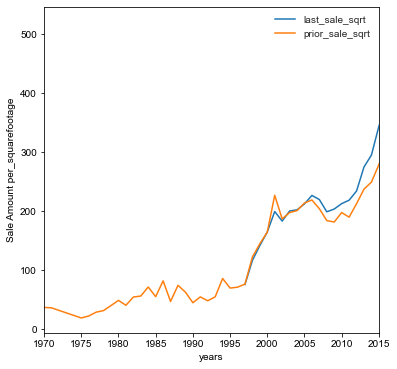

'Từ 2005 trở đi giá nhà đã có sự thay đổi khi last_sale_sqrt đã có phần tăng giá hơn prior_sale_sqrt'

In [43]:
lastSaleAmount=df.groupby('last_Sale_year').mean()['last_sale_sqrt'].plot(figsize=(6,6))
priorSaleAmount=df.groupby('prior_Sale_year').mean()['prior_sale_sqrt'].plot(figsize=(6,6))
plt.style.use('seaborn-whitegrid')
plt.legend()
plt.xlabel('years')
plt.ylabel('Sale Amount per_squarefootage');
plt.xlim(1970,2015);
plt.show()

'''Từ 2005 trở đi giá nhà đã có sự thay đổi khi last_sale_sqrt đã có phần tăng giá hơn prior_sale_sqrt'''

In [44]:
df1=df[df['last_Sale_year']>2005]

In [45]:
df2=df[df['last_Sale_year']<2005]

In [46]:
df2.describe()

,id,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value,last_Sale_year,prior_Sale_year,years_between,last_sale_sqrt,prior_sale_sqrt,Sale_difference,estimated_sqrt
count,3.113000e+03,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3.113000e+03,3.113000e+03,3.113000e+03,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000
mean,5.509180e+07,39.738554,-104.965578,2.722133,2.037584,6.223579,1522.761645,5963.565692,1928.699004,2.622578e+05,2.442252e+05,6.043893e+05,2001.004819,2000.392869,0.611950,169.902933,157.798893,12.104040,400.322307
std,5.239066e+07,0.025527,0.040988,0.894256,1.108596,1.893399,820.538908,4142.851166,28.622089,2.504727e+05,2.543642e+05,4.646846e+05,2.199039,2.136153,1.337759,104.280614,104.212446,60.426109,107.959945
min,2.361660e+05,39.614531,-105.108440,1.000000,0.000000,3.000000,480.000000,1120.000000,1875.000000,5.000000e+02,5.000000e+02,2.177860e+05,1997.000000,1988.000000,0.000000,0.386698,0.386698,-1326.833798,148.522009
25%,2.284170e+07,39.726487,-104.979542,2.000000,1.000000,5.000000,988.000000,4680.000000,1907.000000,1.390000e+05,1.250000e+05,3.800760e+05,1999.000000,1999.000000,0.000000,116.599462,105.443038,0.000000,327.850053
50%,4.320238e+07,39.741560,-104.957120,3.000000,2.000000,6.000000,1300.000000,5950.000000,1925.000000,1.999000e+05,1.849500e+05,4.994430e+05,2001.000000,2000.000000,0.000000,158.971292,144.478844,0.000000,388.837638
75%,5.119086e+07,39.757172,-104.939122,3.000000,2.000000,7.000000,1801.000000,6280.000000,1949.000000,3.060000e+05,2.836000e+05,6.770190e+05,2003.000000,2002.000000,0.000000,208.755760,192.967410,0.000000,459.923077
max,2.164487e+08,39.888020,-104.830930,8.000000,9.000000,22.000000,9780.000000,122839.000000,2014.000000,4.200000e+06,4.475900e+06,7.976662e+06,2004.000000,2004.000000,12.000000,2428.571429,2428.571429,1843.082637,1427.696343


In [47]:
df1.describe()

,id,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value,last_Sale_year,prior_Sale_year,years_between,last_sale_sqrt,prior_sale_sqrt,Sale_difference,estimated_sqrt
count,1.131800e+04,11318.000000,11318.000000,11318.000000,11318.000000,11318.000000,11318.000000,11318.000000,11318.000000,1.131800e+04,1.131800e+04,1.131800e+04,11318.000000,11318.000000,11318.000000,11318.000000,11318.000000,11318.000000,11318.000000
mean,5.251987e+07,39.741060,-104.963671,2.700389,2.239132,6.130942,1508.892737,5779.320728,1929.875596,4.353516e+05,3.189226e+05,6.456050e+05,2012.361548,2007.459357,4.902191,284.322905,206.630009,77.692896,428.333214
std,6.471810e+07,0.023054,0.039539,0.894003,1.175132,1.964381,829.769151,2637.633147,30.308226,4.739875e+05,4.248772e+05,5.107002e+05,3.266715,6.085622,6.417321,186.511194,174.060360,112.384122,124.512933
min,1.452330e+05,39.614540,-105.108407,0.000000,0.000000,0.000000,350.000000,832.000000,1874.000000,2.590000e+02,1.090000e+02,1.477670e+05,2006.000000,1967.000000,0.000000,0.220613,0.043952,-2121.004566,101.317152
25%,9.505201e+06,39.727872,-104.978426,2.000000,1.000000,5.000000,984.000000,4530.000000,1907.000000,2.310000e+05,1.550000e+05,4.036955e+05,2010.000000,2005.000000,0.000000,189.108649,128.592824,0.000000,344.379776
50%,2.217977e+07,39.748632,-104.957692,3.000000,2.000000,6.000000,1252.000000,5950.000000,1925.000000,3.550000e+05,2.500000e+05,5.235335e+05,2013.000000,2008.000000,3.000000,267.576666,188.958131,57.089802,412.252934
75%,5.122595e+07,39.758567,-104.936906,3.000000,3.000000,7.000000,1748.750000,6270.000000,1949.000000,5.001000e+05,3.750000e+05,6.919545e+05,2015.000000,2012.000000,7.000000,355.073024,263.794643,126.063889,493.600382
max,2.515275e+08,39.849160,-104.893468,15.000000,12.000000,39.000000,10907.000000,97125.000000,2016.000000,2.100000e+07,2.100000e+07,1.014531e+07,2017.000000,2017.000000,50.000000,7428.940568,7428.940568,2469.635628,3117.387922


In [48]:
'''Từ hai bảng trên cho thấy giá nhà từ sau năm 2005 tăng giá hơn cách biệt hơn so với lần bán trước do có diện tích lớn hơn,thêm vào đó do quá trình xử lý dữ liệu từ trước 2005 giá bán trước và sau bằng nhau nên không tạo được sự khác biệt mấy'''

'Từ hai bảng trên cho thấy giá nhà từ sau năm 2005 tăng giá hơn cách biệt hơn so với lần bán trước do có diện tích lớn hơn,thêm vào đó do quá trình xử lý dữ liệu từ trước 2005 giá bán trước và sau bằng nhau nên không tạo được sự khác biệt mấy'

### 2. Số lượng nhà bán theo từng năm

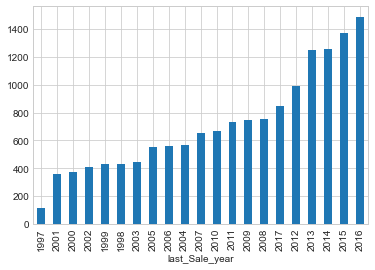

'Từ biểu đồ này sẽ thấy rõ hơn về số lương giao dịch nhà tăng mạnh từ năm 2005'

In [49]:
df['last_Sale_year'].value_counts().sort_values(ascending=True).plot(kind='bar');
plt.xlabel('last_Sale_year')
plt.show()
'''Từ biểu đồ này sẽ thấy rõ hơn về số lương giao dịch nhà tăng mạnh từ năm 2005'''

### 3. ZipCode
    3.1 Số lượng nhà bán theo ZipCode

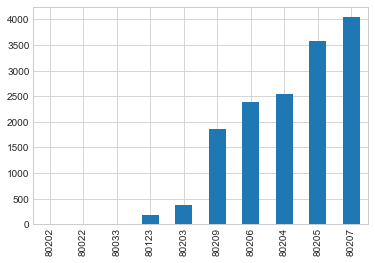

In [50]:
df['zipcode'].value_counts().sort_values(ascending=True).plot(kind='bar');

In [51]:
df_zipcode=df[df['zipcode'].isin(['80207','80205'])]

In [52]:
df_zipcode[['bathrooms','bedrooms','rooms','squareFootage','lotSize','yearBuilt','lastSaleAmount']].describe().T
#75% các căn nhà giao dịch ở 2 mã Zipcode này có từ 6 phòng trở lên, diên tích khoảng 1563 squarefootage, năm xây dựng là 1950

,count,mean,std,min,25%,50%,75%,max
bathrooms,7619.0,1.992584,0.888754,0.0,1.0,2.0,2.0,11.0
bedrooms,7619.0,2.640898,0.819131,1.0,2.0,3.0,3.0,13.0
rooms,7619.0,5.722273,1.535966,2.0,5.0,5.0,6.0,39.0
squareFootage,7619.0,1343.610448,572.043158,360.0,960.0,1177.0,1563.0,7004.0
lotSize,7619.0,5739.896181,2185.208456,832.0,4690.0,6100.0,6350.0,108900.0
yearBuilt,7619.0,1930.198320,28.618601,1875.0,1908.0,1930.0,1950.0,2016.0
lastSaleAmount,7619.0,315410.248589,218986.240788,259.0,185860.0,285000.0,400000.0,10625300.0


In [53]:
df_zipcode2=df[df['zipcode'].isin(['80209','80206','80204'])]

In [54]:
df_zipcode2[['bathrooms','bedrooms','rooms','squareFootage','lotSize','yearBuilt','lastSaleAmount']].describe().T
# Số lượng gd ở các mã zipcode này ít hơn vì giá bán cao, diện tích lớn, nhiều phòng.

,count,mean,std,min,25%,50%,75%,max
bathrooms,6792.0,2.389944,1.381237,0.0,1.0,2.0,3.00,12.0
bedrooms,6792.0,2.757362,0.943565,0.0,2.0,3.0,3.00,15.0
rooms,6792.0,6.602032,2.193526,0.0,5.0,6.0,8.00,30.0
squareFootage,6792.0,1681.555948,1012.553772,350.0,1025.0,1349.0,2033.25,10907.0
lotSize,6792.0,5955.528269,3745.775200,967.0,4460.0,5940.0,6250.00,122839.0
yearBuilt,6792.0,1928.588928,30.077136,1874.0,1907.0,1923.0,1948.00,2016.0
lastSaleAmount,6792.0,486533.256478,578254.509716,500.0,205000.0,365000.0,571625.00,21000000.0


3.2 Sự chênh lệch giá giữa các Zipcode

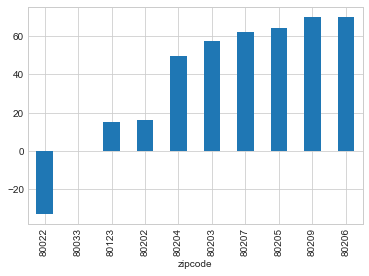

In [55]:
df.groupby('zipcode').mean()['Sale_difference'].sort_values(ascending=True).plot(kind='bar');

In [56]:
df[df['zipcode'].isin(['80022'])].T
# Xem thông tin mã Zipcode 80022 bị giảm giá, cũng có thể là do quá ít phòng.
# Trong khi đó tại mã 80209 và 80206 có sự chênh lệch cao vì có diện tích lớn, và số phòng nhiều.

,0,1
id,39525749,184578398
address,8171 E 84th Ave,10556 Wheeling St
city,Denver,Denver
state,CO,CO
zipcode,80022,80022
latitude,39.84916,39.88802
longitude,-104.893468,-104.83093
bedrooms,3,2
bathrooms,2.0,2.0
rooms,6,6


### 4. YearBuilt
    4.1 Số lượng nhà bán theo YearBuilt

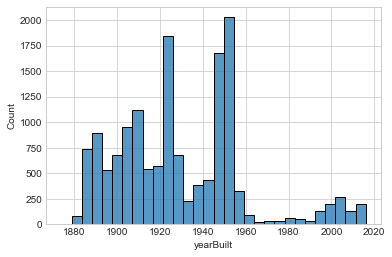

'Top 3 các năm xây dựng có số lượng nhà giao dịch nhiều nhất là 1925, 1945 và 1950'

In [68]:
sns.histplot(df['yearBuilt'],bins=30);
plt.show()
'''Top 3 các năm xây dựng có số lượng nhà giao dịch nhiều nhất là 1925, 1945 và 1950'''

In [58]:
df_yearbuilt=df[df['yearBuilt'].isin([1925,1945,1950])]

In [59]:
df_yearbuilt[['bathrooms','bedrooms','rooms','squareFootage','lotSize','yearBuilt','lastSaleAmount']].describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,789.0,1.901774,0.889617,1.0,1.0,2.0,2.0,7.0
bedrooms,789.0,2.394170,0.676297,1.0,2.0,2.0,3.0,5.0
rooms,789.0,5.481622,1.361631,3.0,5.0,5.0,6.0,12.0
squareFootage,789.0,1190.223067,552.722083,476.0,854.0,1054.0,1305.0,6541.0
lotSize,789.0,6330.105196,4039.767912,2070.0,5210.0,6250.0,6500.0,108900.0
yearBuilt,789.0,1935.481622,11.999735,1925.0,1925.0,1925.0,1950.0,1950.0
lastSaleAmount,789.0,342695.972117,256381.075920,500.0,177500.0,290000.0,422000.0,2585000.0


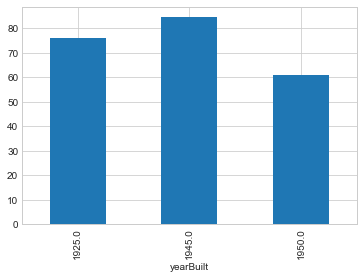

In [60]:
df_yearbuilt.groupby('yearBuilt').mean()['Sale_difference'].plot(kind='bar');

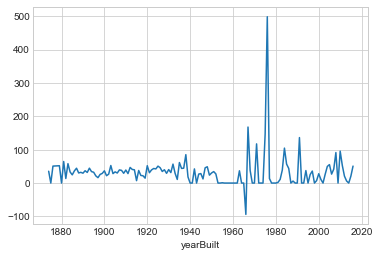

In [61]:
df.groupby('yearBuilt').median()['Sale_difference'].plot();

# 5.Giá trị ước tính(estimated_value)

In [62]:
df_rebuilt=df[df['yearBuilt']>df['last_Sale_year']]

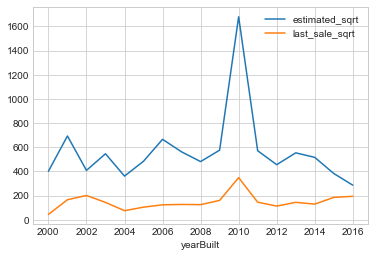

'Việc xây dựng lại đã ảnh hưởng đáng kể đến giá trị ước tính'

In [67]:
estimated_sqrt=df_rebuilt.groupby('yearBuilt').median()['estimated_sqrt'].plot()
last_sale_sqrt=df_rebuilt.groupby('yearBuilt').median()['last_sale_sqrt'].plot()
plt.legend();
plt.show()
'''Việc xây dựng lại đã ảnh hưởng đáng kể đến giá trị ước tính'''

In [72]:
df.corr().loc['estimated_value', :].sort_values(ascending=False)

estimated_value    1.000000
squareFootage      0.825538
lastSaleAmount     0.750100
bathrooms          0.717195
priorSaleAmount    0.603553
rooms              0.582147
lotSize            0.456588
estimated_sqrt     0.449787
bedrooms           0.369651
last_sale_sqrt     0.258724
prior_sale_sqrt    0.217473
yearBuilt          0.174659
id                 0.126693
longitude          0.121844
Sale_difference    0.085590
years_between      0.031185
last_Sale_year     0.024041
prior_Sale_year   -0.008233
latitude          -0.266153
Name: estimated_value, dtype: float64

In [78]:
fields=['lastSaleDate','priorSaleDate','zipcode','address','city','state','id','latitude','longitude','last_Sale_year','prior_Sale_year','years_between','last_sale_sqrt','prior_sale_sqrt','Sale_difference','estimated_sqrt']
create_df=df.drop(fields,axis=1)
create_df

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
0,3,2.0,6,1378,9968,2003.0,75000,165700.0,239753
1,2,2.0,6,1653,6970,2004.0,216935,216935.0,343963
2,3,1.0,0,1882,23875,1917.0,330000,330000.0,488840
3,4,3.0,0,2400,11500,1956.0,185000,185000.0,494073
4,3,4.0,8,2305,5600,1998.0,308000,308000.0,513676
...,...,...,...,...,...,...,...,...,...
14995,4,4.0,8,2169,4950,1922.0,333000,333000.0,1080081
14996,3,3.0,11,2937,4500,1890.0,645000,557500.0,807306
14997,3,5.0,7,2937,4680,2007.0,1115000,1208214.0,1737156
14998,3,4.0,10,3193,4970,2005.0,1350000,405000.0,2008794


In [83]:
estimated_corr=create_df.corr()
estimated_corr

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
bedrooms,1.000000,0.504689,0.711832,0.620682,0.158874,-0.064375,0.255065,0.223289,0.369651
bathrooms,0.504689,1.000000,0.685748,0.804372,0.260064,0.192379,0.545691,0.438497,0.717195
rooms,0.711832,0.685748,1.000000,0.771073,0.176760,-0.049543,0.419848,0.357524,0.582147
squareFootage,0.620682,0.804372,0.771073,1.000000,0.370331,0.114153,0.604708,0.510632,0.825538
lotSize,0.158874,0.260064,0.176760,0.370331,1.000000,0.286513,0.346212,0.322273,0.456588
yearBuilt,-0.064375,0.192379,-0.049543,0.114153,0.286513,1.000000,0.140578,0.116888,0.174659
lastSaleAmount,0.255065,0.545691,0.419848,0.604708,0.346212,0.140578,1.000000,0.819342,0.750100
priorSaleAmount,0.223289,0.438497,0.357524,0.510632,0.322273,0.116888,0.819342,1.000000,0.603553
estimated_value,0.369651,0.717195,0.582147,0.825538,0.456588,0.174659,0.750100,0.603553,1.000000


In [85]:
ones_corr = np.ones_like(estimated_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [86]:
ones_corr.shape, estimated_corr.shape

((9, 9), (9, 9))

In [87]:
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

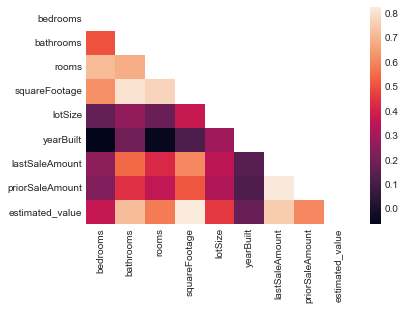

In [90]:
sns.heatmap(data=estimated_corr,mask=mask);

In [91]:
adjusted_mask = mask[1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [92]:
adjusted_estimated_corr = estimated_corr.iloc[1:, :-1]

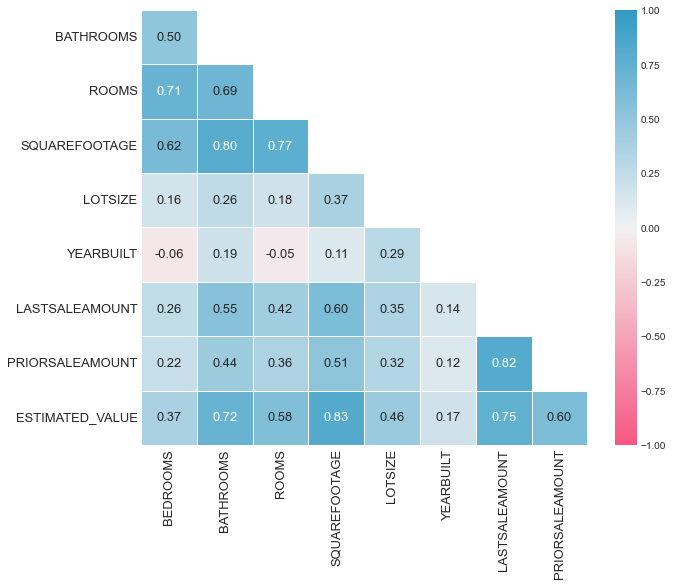

'Từ biểu đồ heatmap cho thấy các giá trị ảnh hưởng đến estimated_value là squareFootage, lastSaleAmount, Bathrooms'

In [101]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(data=adjusted_estimated_corr, mask=adjusted_mask,
            annot=True, annot_kws={"fontsize":13}, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);
yticks = [i.upper() for i in adjusted_estimated_corr.index]
xticks = [i.upper() for i in adjusted_estimated_corr.columns]
ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
plt.show()
'''Từ biểu đồ heatmap cho thấy các giá trị ảnh hưởng đến estimated_value là squareFootage, lastSaleAmount, Bathrooms'''

# 5.1 Estimated_Value with bathrooms

<AxesSubplot:xlabel='bathrooms'>

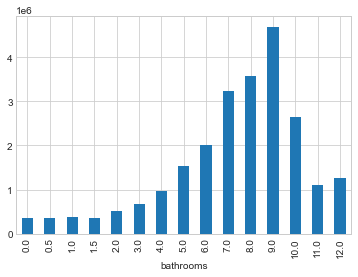

In [122]:
create_df.groupby('bathrooms').median()['estimated_value'].plot(kind='bar')

In [127]:
df_bathromms=df[df['bathrooms'].isin([5,6,7,8,9,10])]
df_bathromms[['estimated_value','squareFootage','lotSize','yearBuilt','bathrooms','bedrooms','rooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
estimated_value,668.0,2.124978e+06,1.329056e+06,361233.0,1222307.25,1748868.5,2568721.25,10145310.0
squareFootage,668.0,3.849313e+03,1.239234e+03,1528.0,3027.25,3600.0,4398.50,10907.0
lotSize,668.0,9.669452e+03,9.691317e+03,1250.0,6240.00,6299.5,10325.00,122839.0
yearBuilt,668.0,1.960600e+03,4.500322e+01,1884.0,1919.00,1956.0,2005.00,2016.0
bathrooms,668.0,5.622754e+00,9.617373e-01,5.0,5.00,5.0,6.00,10.0
bedrooms,668.0,3.952096e+00,1.305316e+00,1.0,3.00,4.0,4.00,15.0
rooms,668.0,1.030838e+01,3.029706e+00,5.0,8.00,10.0,12.00,30.0


In [126]:
df_bathromms2=df[df['bathrooms'].isin([11,12])]
df_bathromms2[['estimated_value','squareFootage','lotSize','yearBuilt','bathrooms','bedrooms','rooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
estimated_value,3.0,1.150325e+06,317009.903474,795236.0,1023051.5,1250867.0,1327869.0,1404871.0
squareFootage,3.0,4.523667e+03,512.930145,3947.0,4321.0,4695.0,4812.0,4929.0
lotSize,3.0,6.263667e+03,20.305993,6250.0,6252.0,6254.0,6270.5,6287.0
yearBuilt,3.0,1.907667e+03,21.548395,1887.0,1896.5,1906.0,1918.0,1930.0
bathrooms,3.0,1.133333e+01,0.577350,11.0,11.0,11.0,11.5,12.0
bedrooms,3.0,9.333333e+00,3.511885,6.0,7.5,9.0,11.0,13.0
rooms,3.0,2.500000e+01,12.489996,15.0,18.0,21.0,30.0,39.0


In [141]:
# Số nhà có phòng tắm từ 6 phòng đến 10 phòng giá trị estimated_value cao vì có thể phù hợp nhu cầu người mua nhiều, năm xây dựng lại mới khoảng 75% là từ năm 2005
# Số nhà có phòng tắm từ 10 phòng trở lên hoặc thấp hơn 6 phòng có thể do một phần không phù hợp với nhu cầu người mua, và năm xây dựng của các từ 10 phòng đã quá cũ chủ yểu từ năm 1918

<AxesSubplot:xlabel='bathrooms'>

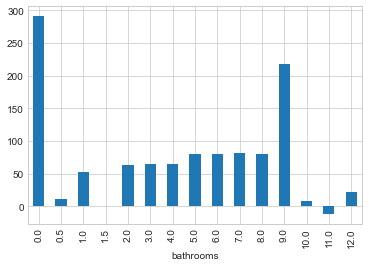

In [142]:
df.groupby('bathrooms').mean()['Sale_difference'].plot(kind='bar')

# 5.2 Estimated_value with squareFootage

square_pivot= df.pivot_table(index='squareFootage',values='estimated_value',aggfunc= np.median)
square_pivot.reset_index()

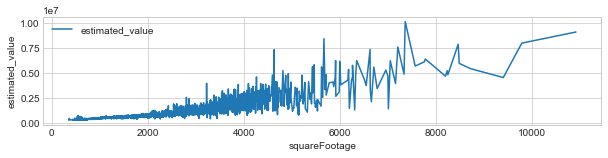

In [151]:
square_pivot.plot(figsize=(10,2))
plt.xlabel('squareFootage')
plt.ylabel('estimated_value')
plt.xticks();

 # 5.3 Estimated_Value with LastSaleAmount

In [159]:
lastsale_pivot= df.pivot_table(index='last_sale_sqrt',values='estimated_sqrt',aggfunc= np.mean)
lastsale_pivot.reset_index()

,last_sale_sqrt,estimated_sqrt
0,0.220613,390.285349
1,0.237417,261.048908
2,0.315457,411.203155
3,0.383110,388.516993
4,0.386698,283.267595
...,...,...
14234,3608.247423,987.615722
14235,4515.158031,651.648033
14236,7013.399340,293.059406
14237,7351.555137,1446.430726


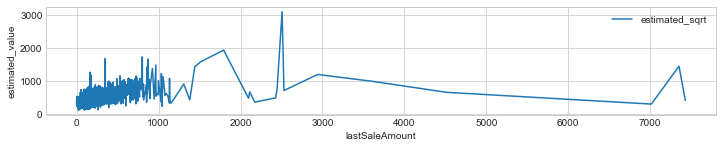

In [160]:
lastsale_pivot.plot(figsize=(12,2))
plt.xlabel('lastSaleAmount')
plt.ylabel('estimated_value')
plt.xticks();

# 6. Tổng kết

In [161]:
df_up=df[df['Sale_difference']>0]
len_up=round(len(df_up)/len(df)*100,2)
df_down=df[df['Sale_difference']<0]
len_down=round(len(df_down)/len(df)*100,2)
df_no_change=df[df['Sale_difference']==0]
len_nochange=round(len(df_no_change)/len(df)*100,2)

In [162]:
print(f'Number of houses up price::{len(df_up)} ,Accounting for {len_up} % percent')
print(f'Number of houses down price:{len(df_down)} ,Accounting for {len_down} % percent')
print(f'Number of houses no change price:{len(df_no_change)} ,Accounting for {len_nochange} % percent')

Number of houses up price::8850 ,Accounting for 59.07 % percent
Number of houses down price:711 ,Accounting for 4.75 % percent
Number of houses no change price:5420 ,Accounting for 36.18 % percent


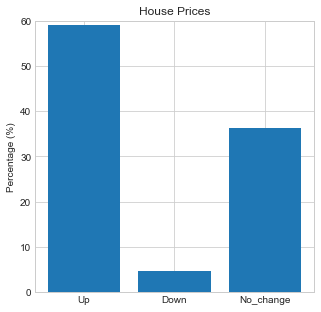

In [163]:
Houses_prices = {"Up": len_up, "Down": len_down, "No_change": len_nochange}
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(Houses_prices.keys(),Houses_prices.values());
plt.ylim(0,60)
ax.set(title="House Prices", ylabel="Percentage (%)");

In [168]:
df_up.describe()

,id,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value,last_Sale_year,prior_Sale_year,years_between,last_sale_sqrt,prior_sale_sqrt,Sale_difference,estimated_sqrt
count,8.850000e+03,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000,8.850000e+03,8.850000e+03,8.850000e+03,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000
mean,4.617393e+07,39.741347,-104.961184,2.684746,2.243051,6.140904,1487.117966,5587.325650,1928.139435,4.481041e+05,2.798769e+05,6.403965e+05,2011.922599,2006.049718,5.872881,301.113778,190.298105,110.815673,432.954881
std,5.752366e+07,0.023208,0.037525,0.857613,1.126013,1.884185,766.650017,2261.522877,29.699310,3.671903e+05,2.346007e+05,4.773412e+05,4.429659,6.693811,6.628461,130.772722,98.277381,100.888832,119.478528
min,1.452330e+05,39.614539,-105.108407,0.000000,0.000000,0.000000,350.000000,832.000000,1874.000000,8.848000e+03,1.090000e+02,1.477670e+05,1998.000000,1967.000000,0.000000,10.711864,0.043952,0.031536,101.317152
25%,9.284435e+06,39.728433,-104.976066,2.000000,2.000000,5.000000,996.000000,4460.000000,1906.000000,2.600000e+05,1.500000e+05,4.160218e+05,2009.000000,2002.000000,1.000000,211.040189,121.509567,47.170946,350.838255
50%,2.300029e+07,39.749279,-104.956423,3.000000,2.000000,6.000000,1268.000000,5940.000000,1925.000000,3.710000e+05,2.350000e+05,5.355240e+05,2013.000000,2007.000000,4.000000,283.932414,178.948701,88.697744,419.828732
75%,4.634442e+07,39.758601,-104.935800,3.000000,3.000000,7.000000,1710.000000,6250.000000,1949.000000,5.100000e+05,3.464365e+05,6.872922e+05,2015.000000,2011.000000,8.000000,368.324230,249.162300,146.978088,498.420589
max,2.515274e+08,39.772691,-104.899112,13.000000,12.000000,39.000000,8456.000000,97125.000000,2016.000000,6.800000e+06,4.250000e+06,1.014531e+07,2017.000000,2017.000000,50.000000,2530.364372,1777.819389,2469.635628,1941.164675


In [169]:
df_down.describe()

,id,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value,last_Sale_year,prior_Sale_year,years_between,last_sale_sqrt,prior_sale_sqrt,Sale_difference,estimated_sqrt
count,7.110000e+02,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,7.110000e+02,7.110000e+02,7.110000e+02,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,2.589157e+07,39.737431,-104.970198,2.763713,2.343179,6.437412,1656.112518,6231.104079,1936.535865,3.592788e+05,5.118795e+05,7.175112e+05,2009.566807,2005.568214,3.998594,195.379616,271.251873,-75.872257,418.316745
std,3.837729e+07,0.026058,0.045091,1.069621,1.477657,2.465813,1111.004093,4119.409132,32.239396,4.307267e+05,9.456653e+05,7.193268e+05,3.283887,3.672210,3.705154,137.951215,291.769426,246.825490,161.697599
min,1.884850e+05,39.614540,-105.105872,1.000000,0.000000,3.000000,506.000000,1510.000000,1880.000000,5.000000e+02,1.836400e+04,2.256640e+05,1999.000000,1984.000000,0.000000,0.579374,21.254630,-3356.677131,124.307764
25%,4.497984e+06,39.724815,-104.987796,2.000000,1.000000,5.000000,961.000000,4690.000000,1910.500000,1.300000e+05,1.732275e+05,3.603815e+05,2007.000000,2004.000000,1.000000,116.805445,160.272098,-63.947573,328.947825
50%,1.405122e+07,39.737763,-104.957758,3.000000,2.000000,6.000000,1277.000000,6250.000000,1937.000000,2.210000e+05,2.720000e+05,4.976400e+05,2010.000000,2006.000000,3.000000,172.251309,211.466165,-29.330889,393.270136
75%,3.052621e+07,39.757011,-104.939420,3.000000,3.000000,7.000000,1926.000000,6350.000000,1952.000000,3.975000e+05,4.832500e+05,7.235130e+05,2012.000000,2007.000000,6.000000,252.116234,295.433038,-12.036835,483.034386
max,2.193889e+08,39.849160,-104.893468,15.000000,11.000000,21.000000,9394.000000,88862.000000,2016.000000,3.600000e+06,1.600000e+07,6.219320e+06,2017.000000,2017.000000,29.000000,2507.676561,3863.801014,-0.075758,3117.387922
